# All you need to know about the android market


## 1. Loading Packages and Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from collections import Counter

plt.style.use('ggplot')
%matplotlib inline
warnings.simplefilter('ignore')

In [2]:
apps = pd.read_csv('apps.csv')
apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
app_names = pd.read_csv('googleplaystore.csv')
app_names.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
user_reviews = pd.read_csv('googleplaystore_user_reviews.csv')
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
apps.dtypes

Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
apps.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## 2. Data Cleaning
Data set can contain missing data, numeric string values, various cues. If we can clean them, we can make easy our analysis.

### Category 

In [5]:
apps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [5]:
apps[apps.Category == '1.9']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


We can make NaN category value. We can use shift() method found in pandas library.
In this case however, I opted to drop the entire row.

In [6]:
apps = apps.drop(10472)

In [7]:
apps.loc[apps.Category == '1.9']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Rating

In [9]:
apps.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [8]:
apps.Rating = pd.to_numeric(apps.Rating, errors='coerce')
apps.Rating.dtype

dtype('float64')

### Size

In [11]:
apps.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [9]:
apps.Size = apps.Size.str.replace('M', '000')    # convert MBs to KBs to be converted to MBs later
apps.Size = apps.Size.replace('Varies with device', np.nan)
apps.Size = apps.Size.str.replace('.', '')
apps.Size = apps.Size.str.replace('k', '')
#apps.Size = [x.strip('k') if type(x) == str else x for x in apps.Size]
apps.Size = pd.to_numeric(apps.Size, errors='coerce')
apps.Size = apps.Size/1000   # all size values to MBs


In [236]:
apps.Size.sample(10)

963     25.0
8630     NaN
4148    59.0
8429    94.0
6936    23.0
6194    35.0
8356    45.0
238     20.0
653     33.0
371      NaN
Name: Size, dtype: float64

### Installs

In [14]:
apps.Installs.sample(10)

1914     100,000,000+
551       10,000,000+
10494            100+
2675      10,000,000+
3080       5,000,000+
4930      10,000,000+
7763       1,000,000+
2671       1,000,000+
5242           1,000+
9259           1,000+
Name: Installs, dtype: object

In [10]:
apps.Installs = [x.strip('+') if type(x) == str else x for x in apps.Installs]
apps.Installs = [x.replace(',', '') if type(x) == str else x for x in apps.Installs]
apps.Installs = apps.Installs.replace('Free', np.nan)
apps.Installs = pd.to_numeric(apps.Installs, errors='coerce')

apps.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

### Reviews

In [16]:
apps.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [11]:
apps.Reviews = pd.to_numeric(apps.Reviews, errors='coerce')
apps.Reviews.sample(10)

1618        987
6656      13466
1300      10445
6935      12572
4943       5107
3278         59
10424       232
9331          1
1771     141529
5482          1
Name: Reviews, dtype: int64

### Price

In [12]:
apps.Price = [x.strip('$') if type(x) == str else x for x in apps.Price]
apps.Price = apps.Price.replace('Everyone', np.nan)
apps.Price = pd.to_numeric(apps.Price, errors='coerce')
apps.Price.sample(10)


9641     0.0
346      0.0
9162     0.0
1287     0.0
10825    0.0
10501    0.0
2576     0.0
3227     0.0
3736     0.0
8454     0.0
Name: Price, dtype: float64

## 3. Exploratory Data Analysis

Let's Explore our data. :)
* corr() : It returns correlation
* describe() : Returns number of entries, average of entries, outlier values, standard deviation, minimum and maximum entry.

In [19]:
apps.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.048393,0.051355,-0.021903
Reviews,0.068141,1.000000,0.128560,0.643122,-0.009667
Size,0.048393,0.128560,1.000000,0.064016,-0.010737
Installs,0.051355,0.643122,0.064016,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.010737,-0.011689,1.000000


In [20]:
apps.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,38.967976,1.546434e+07,1.027368
std,0.515219,2.927761e+06,25.048622,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.011000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,19.000000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,33.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,55.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


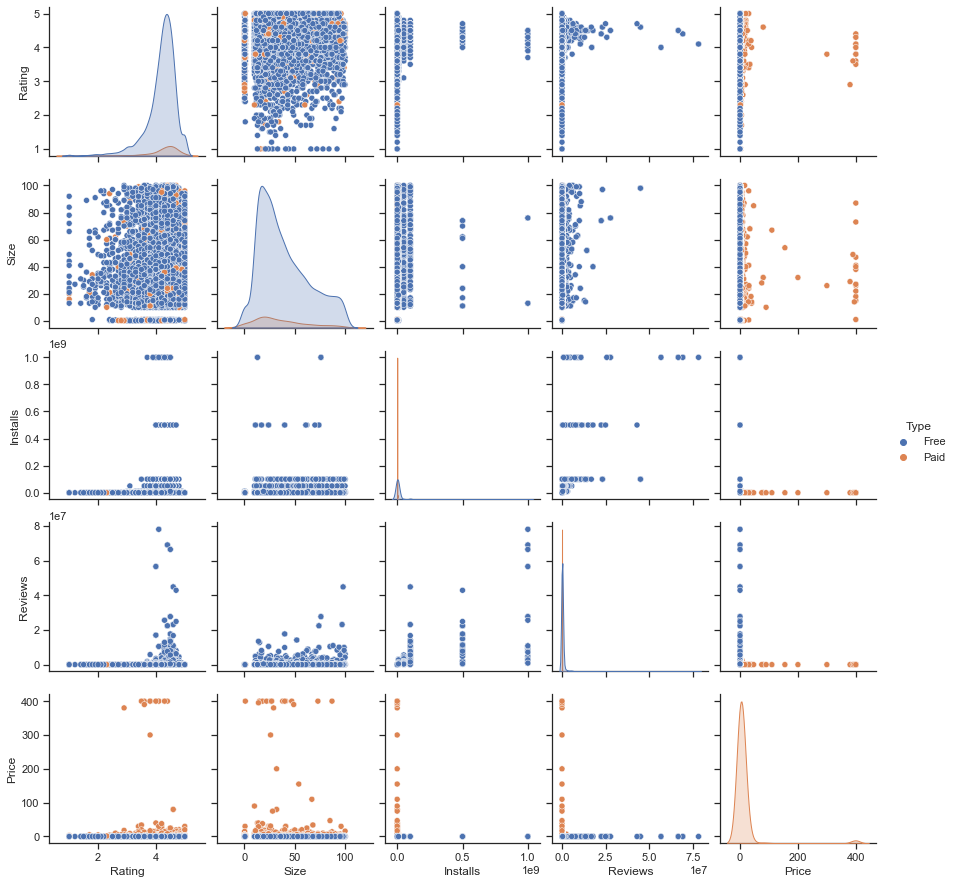

In [21]:
sns.set_theme(style='ticks')

sns.pairplot(apps, hue='Type',  x_vars=['Rating', 'Size', 'Installs', 'Reviews', 'Price'],
                y_vars=['Rating', 'Size', 'Installs', 'Reviews', 'Price'])

A pair plot is another way of showing the correlation between attributes in the data set.

## 4. Android Market Breakdown

###  Apps Category and its share in the Play Store

In [22]:
market = apps.groupby(apps.Category)['Installs'].count().sort_values(ascending=False)
market = round((market/market.sum())*100, 3)
market

Category
FAMILY                 18.192
GAME                   10.554
TOOLS                   7.777
MEDICAL                 4.271
BUSINESS                4.244
PRODUCTIVITY            3.911
PERSONALIZATION         3.616
COMMUNICATION           3.570
SPORTS                  3.542
LIFESTYLE               3.524
FINANCE                 3.376
HEALTH_AND_FITNESS      3.146
PHOTOGRAPHY             3.090
SOCIAL                  2.721
NEWS_AND_MAGAZINES      2.611
SHOPPING                2.399
TRAVEL_AND_LOCAL        2.380
DATING                  2.159
BOOKS_AND_REFERENCE     2.131
VIDEO_PLAYERS           1.614
EDUCATION               1.439
ENTERTAINMENT           1.375
MAPS_AND_NAVIGATION     1.264
FOOD_AND_DRINK          1.172
HOUSE_AND_HOME          0.812
LIBRARIES_AND_DEMO      0.784
AUTO_AND_VEHICLES       0.784
WEATHER                 0.756
ART_AND_DESIGN          0.600
EVENTS                  0.590
COMICS                  0.554
PARENTING               0.554
BEAUTY                  0.489
N

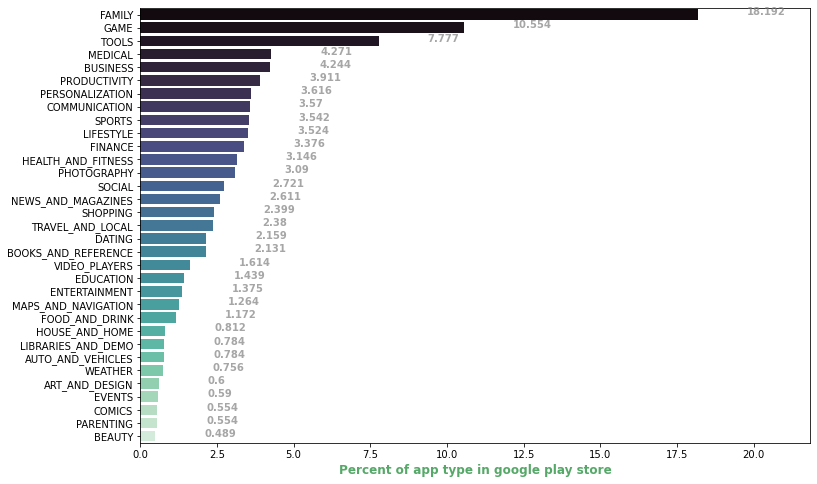

In [23]:
plt.figure(figsize=(12,8))
plt.style.use('default')


sns.barplot(market, market.index, palette='mako')
plt.ylabel(None)
plt.xlabel('Percent of app type in google play store', fontdict={'fontsize':12, 'fontweight':'bold'}, color='g')
plt.xlim(0, max(market)*1.2)

for i, v in enumerate(market):
    plt.text(v +1.6, i, str(v), color='grey', fontweight='bold', alpha=0.7);

*  <b>Family</b> and  <b>Game</b> have the highest market prevelance.
* Interestingly, <b> Tools, Medical and Business</b> apps are also catching up.

### Paid apps

In [24]:
paid = apps.loc[apps.Price > 0]
paidApps = paid.groupby('Category')['Price'].count().sort_values(ascending=False)
paidApps = round((paidApps/paidApps.sum())*100, 3)
paidApps

Category
FAMILY                 23.875
MEDICAL                13.625
GAME                   10.375
PERSONALIZATION        10.375
TOOLS                   9.750
BOOKS_AND_REFERENCE     3.500
PRODUCTIVITY            3.500
COMMUNICATION           3.375
SPORTS                  3.000
PHOTOGRAPHY             2.750
LIFESTYLE               2.375
FINANCE                 2.125
HEALTH_AND_FITNESS      2.000
BUSINESS                1.750
TRAVEL_AND_LOCAL        1.500
WEATHER                 1.000
DATING                  0.875
MAPS_AND_NAVIGATION     0.625
VIDEO_PLAYERS           0.500
EDUCATION               0.500
AUTO_AND_VEHICLES       0.375
ART_AND_DESIGN          0.375
SOCIAL                  0.375
ENTERTAINMENT           0.250
FOOD_AND_DRINK          0.250
NEWS_AND_MAGAZINES      0.250
PARENTING               0.250
SHOPPING                0.250
EVENTS                  0.125
LIBRARIES_AND_DEMO      0.125
Name: Price, dtype: float64

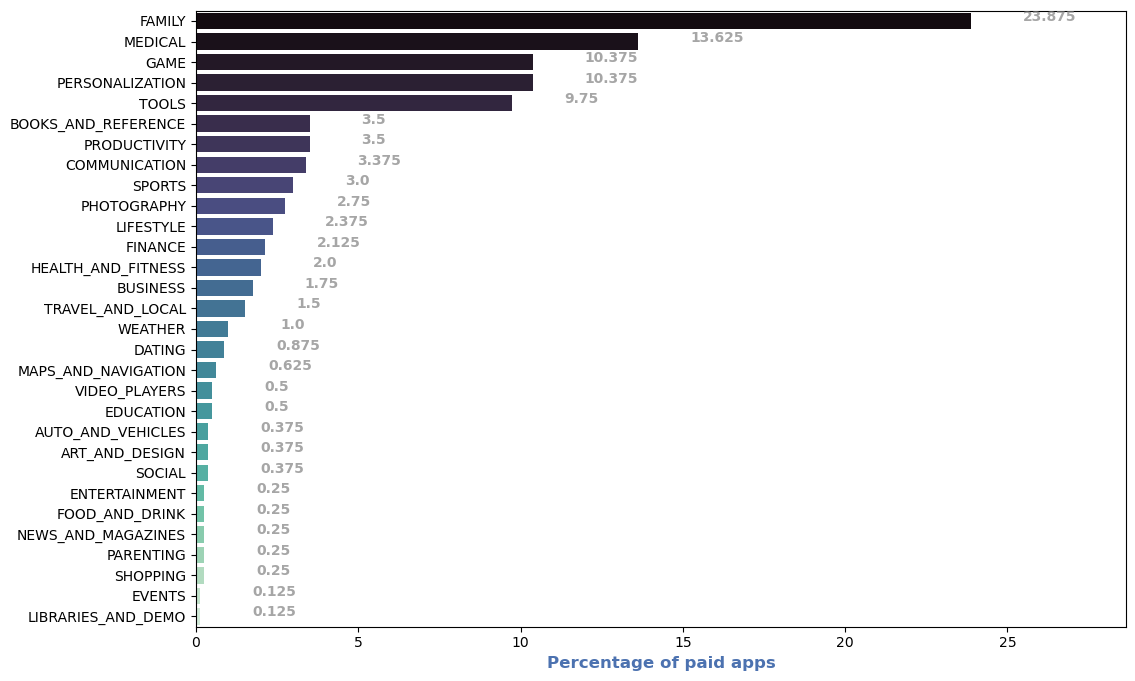

In [25]:
plt.figure(figsize=(12,8))
plt.style.use('default')

sns.barplot(paidApps, paidApps.index, palette='mako')
plt.ylabel(None)
plt.xlabel('Percentage of paid apps', fontdict={'fontsize':12, 'fontweight':'bold'}, color='b')
plt.xlim(0, max(paidApps)*1.2)


for i, v in enumerate(paidApps):
    plt.text(v + 1.6, i, str(v), color='grey', fontweight='bold', alpha=0.7)

Family apps lead in category of apps that requires a subscription to use them. 

### Average Rating of Apps

Number of Apps between a 0.5 rating range

In [26]:
avg_rating = apps.Rating.mean()
avg_rating

4.191757420456978

Average app rating = <b>4.191757420456978</b>

In [27]:
lowest = apps.loc[(apps.Rating > 0) & (apps.Rating <= 1)].count()[0]
lower = apps.loc[(apps.Rating > 1) & (apps.Rating <= 1.5)].count()[0]
low = apps.loc[(apps.Rating > 1.5) & (apps.Rating <= 2)].count()[0]
middle = apps.loc[(apps.Rating > 2) & (apps.Rating <= 2.5)].count()[0]
upper_middle = apps.loc[(apps.Rating > 2.5) & (apps.Rating <= 3)].count()[0]
high = apps.loc[(apps.Rating > 3) & (apps.Rating <= 3.5)].count()[0]
higher = apps.loc[(apps.Rating > 3.5) & (apps.Rating <= 4)].count()[0]
highest = apps.loc[(apps.Rating > 4) & (apps.Rating <= 4.5)].count()[0]
most = apps.loc[(apps.Rating > 4.5) & (apps.Rating <= 5)].count()[0]

apps_rating = {'Rating':['1', '1-1.5', '1.5-2', '2-2.5', '2.5-3','3-3.5', '3.5-4','4-4.5','4.5-5'], 'No. of Apps':
                            [ lowest, lower, low, middle, upper_middle, high, higher, highest, most]}
               
apps_rating = pd.DataFrame(apps_rating)
apps_rating

,Rating,No. of Apps
0,1,16
1,1-1.5,7
2,1.5-2,45
3,2-2.5,82
4,2.5-3,220
5,3-3.5,526
6,3.5-4,1670
7,4-4.5,4883
8,4.5-5,1917


Most Apps are rated between <b>4</b> and <b>5</b> star

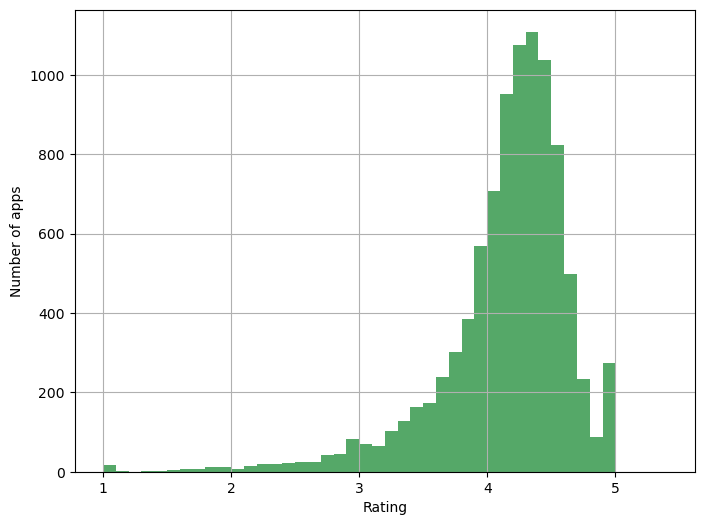

In [28]:
plt.figure(figsize=(8,6))

plt.hist(apps.Rating, bins= np.arange(1,5.5, 0.1), color='g')
plt.xlabel('Rating')
plt.ylabel('Number of apps')
plt.grid();

Let's break this down and inspect whether we have categories which perform exceptionally good or bad.

We will conduct an <b>ANOVA TEST</b> to establish whether there is difference inn the rating of different categories.

<b>H<sub>0</sub></b> : There is no difference in rating among different categories.<br>
<b>H<sub>a</sub></b> : There is difference in rating among different categories.

In [29]:
business = apps.loc[apps.Category == 'BUSINESS'].Rating.dropna()
communication = apps.loc[apps.Category == 'COMMUNICATION'].Rating.dropna()
family = apps.loc[apps.Category == 'FAMILY'].Rating.dropna()
game = apps.loc[apps.Category == 'GAME'].Rating.dropna()
finance = apps.loc[apps.Category == 'FINANCE'].Rating.dropna()
health_fitness = apps.loc[apps.Category == 'HEALTH_AND_FITNESS'].Rating.dropna()
lifestyle = apps.loc[apps.Category == 'LIFESTYLE'].Rating.dropna()
medical = apps.loc[apps.Category == 'MEDICAL'].Rating.dropna()
personalization = apps.loc[apps.Category == 'PERSONALIZATION'].Rating.dropna()
productivity = apps.loc[apps.Category == 'PRODUCTIVITY'].Rating.dropna()
sports = apps.loc[apps.Category == 'SPORTS'].Rating.dropna()
tools = apps.loc[apps.Category == 'TOOLS'].Rating.dropna()
medical

2243     4.2
2244     4.4
2245     4.6
2246     4.5
2247     4.8
        ... 
10400    1.0
10410    4.5
10523    4.4
10730    4.5
10768    3.8
Name: Rating, Length: 350, dtype: float64

In [30]:
# ANOVA TEST 
f_oneway(business, communication, family, game, finance, health_fitness, 
         lifestyle, medical, personalization, sports, tools)

F_onewayResult(statistic=14.42176723435891, pvalue=1.2139310594765121e-25)

The <b>p-value</b> is less than <b>0.05</b> (1.2139310594765121e-25).  Hence we reject the null hypothesis and conclude that there is existing difference in the rating of different app categories.

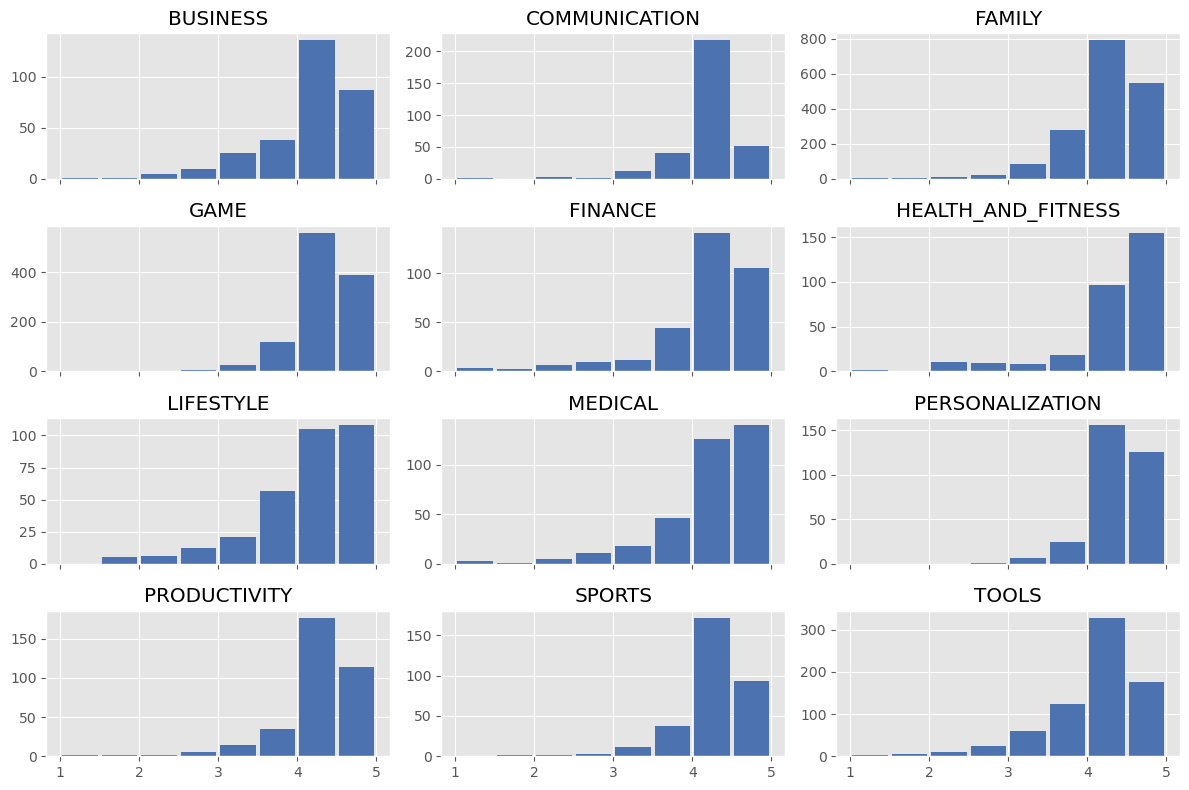

In [41]:
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, figsize=(12,8))
#plt.rcParams['axes.grid'] = True

axs[0,0].hist(business, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[0,0].set_title('BUSINESS')

axs[0,1].hist(communication, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[0,1].set_title('COMMUNICATION')

axs[0,2].hist(family, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[0,2].set_title('FAMILY')

axs[1,0].hist(game, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[1,0].set_title('GAME')

axs[1,1].hist(finance, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[1,1].set_title('FINANCE')

axs[1,2].hist(health_fitness, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[1,2].set_title('HEALTH_AND_FITNESS')

axs[2,0].hist(lifestyle, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[2,0].set_title('LIFESTYLE')

axs[2,1].hist(medical, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[2,1].set_title('MEDICAL')

axs[2,2].hist(personalization, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[2,2].set_title('PERSONALIZATION')

axs[3,0].hist(productivity, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[3,0].set_title('PRODUCTIVITY')

axs[3,1].hist(sports, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[3,1].set_title('SPORTS')

axs[3,2].hist(tools, bins=np.arange(1,5.5,0.5), color='b', rwidth=0.9)
axs[3,2].set_title('TOOLS')

for axs in axs:
    plt.grid()
    
    
fig.tight_layout() 


The average app rating across categories is significantly different<br><br>

### Best performing categories

In [115]:
performance = apps[['Category', 'Rating']]

social_rating = performance.loc[performance.Category == 'SOCIAL']
travel_rating = performance.loc[performance.Category == 'TRAVEL_AND_LOCAL']
communication_rating = performance.loc[performance.Category == 'COMMUNICATION']
finance_rating = performance.loc[performance.Category == 'FINANCE']
productivity_rating = performance.loc[performance.Category == 'PRODUCTIVITY']
health_rating = performance.loc[performance.Category == 'HEALTH_AND_FITNESS']
shopping_rating = performance.loc[performance.Category == 'SHOPPING']
dating_rating = performance.loc[performance.Category == 'DATING']
business_rating = performance.loc[performance.Category == 'BUSINESS']
lifestyle_rating = performance.loc[performance.Category == 'LIFESTYLE']
game_rating = performance.loc[performance.Category == 'GAME']
family_rating = performance.loc[performance.Category == 'FAMILY']
photo_rating = performance.loc[performance.Category == 'PHOTOGRAPHY']
sports_rating = performance.loc[performance.Category == 'SPORTS']
tools_rating = performance.loc[performance.Category == 'TOOLS']
medical_rating = performance.loc[performance.Category == 'MEDICAL']
books_rating = performance.loc[performance.Category == 'BOOKS_AND_REFERENCE']
news_rating = performance.loc[performance.Category == 'NEWS_AND_MAGAZINES']
person_rating = performance.loc[performance.Category == 'PERSONALIZATION']

In [116]:
social_rating = social_rating.Rating.dropna()
travel_rating = travel_rating.Rating.dropna()
communication_rating = communication_rating.Rating.dropna()
finance_rating = finance_rating.Rating.dropna()
productivity_rating = productivity_rating.Rating.dropna()
health_rating = health_rating.Rating.dropna()
shopping_rating = shopping_rating.Rating.dropna()
dating_rating = dating_rating.Rating.dropna()
business_rating = business_rating.Rating.dropna()
lifestyle_rating = lifestyle_rating.Rating.dropna()
game_rating = game_rating.Rating.dropna()
family_rating = family_rating.Rating.dropna()
photo_rating = photo_rating.Rating.dropna()
sports_rating = sports_rating.Rating.dropna()
tools_rating = tools_rating.Rating.dropna()
medical_rating = medical_rating.Rating.dropna()
books_rating = books_rating.Rating.dropna()
news_rating = news_rating.Rating.dropna()
person_rating = person_rating.Rating.dropna()

data =[social_rating, travel_rating, communication_rating, finance_rating,
        productivity_rating,  health_rating, shopping_rating, dating_rating,
        business_rating, lifestyle_rating, game_rating, family_rating, 
        photo_rating, sports_rating, tools_rating, medical_rating, books_rating, 
        news_rating, person_rating]


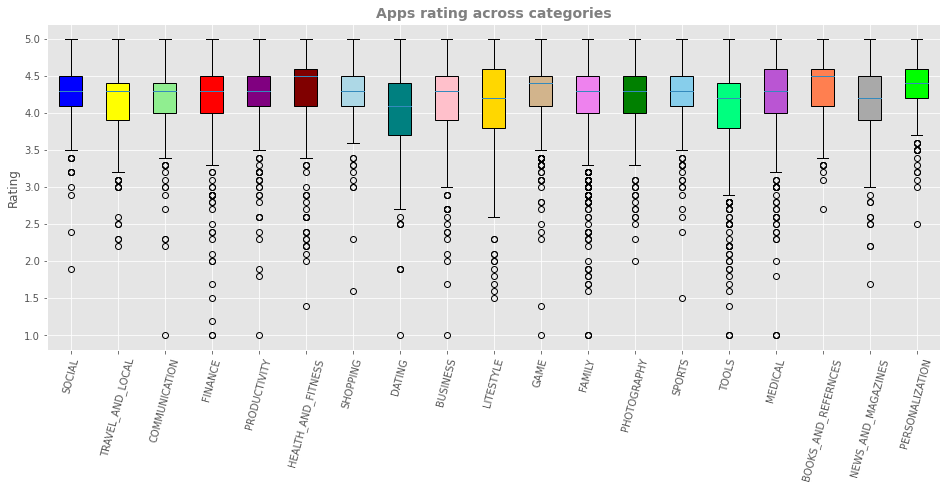

In [121]:
plt.figure(figsize=(16,6))

labels = ['SOCIAL', 'TRAVEL_AND_LOCAL', 'COMMUNICATION', 'FINANCE', 'PRODUCTIVITY', 'HEALTH_AND_FITNESS', 'SHOPPING', 
          'DATING', 'BUSINESS', 'LITESTYLE', 'GAME', 'FAMILY', 'PHOTOGRAPHY', 'SPORTS', 'TOOLS', 'MEDICAL',
          'BOOKS_AND_REFERNCES', 'NEWS_AND_MAGAZINES', 'PERSONALIZATION']
colors = ['b', 'yellow', 'lightgreen', 'red', 'purple', 'maroon', 'lightblue', 
          'teal', 'pink', 'gold', 'tan', 'violet', 'g', 'skyblue', 'springgreen', 'mediumorchid',
          'coral', 'darkgrey', 'lime']

boxes = plt.boxplot(data, labels=labels, patch_artist=True, showfliers=True)

plt.xticks(rotation=75)
plt.yticks(np.arange(1,5.5,0.5))
plt.ylabel('Rating')
plt.title('Apps rating across categories', fontdict={'fontsize':14, 'fontweight':'bold'}, color='grey')

for box in boxes['boxes']:
    for patch, color in zip(boxes['boxes'], colors):
        patch.set_facecolor(color)

* Almost all app categories perform decently. <b>Health and Fitness</b> and <b>Books and Reference</b> produce the highest quality apps with <b>50% apps having a rating greater than 4.5.</b> This is extremely high!<br><br>
* On the contrary, <b>50% of apps in the Dating category have a rating lesser than the average rating.</b><br><br>
* A few <b>junk apps</b> also exist in the <b>Lifestyle, Family</b> and <b>Finance</b> category.<br>

### Sizing Strategy - Light vs Bulky

How do app sizes impact app ratings

<Figure size 600x1000 with 0 Axes>

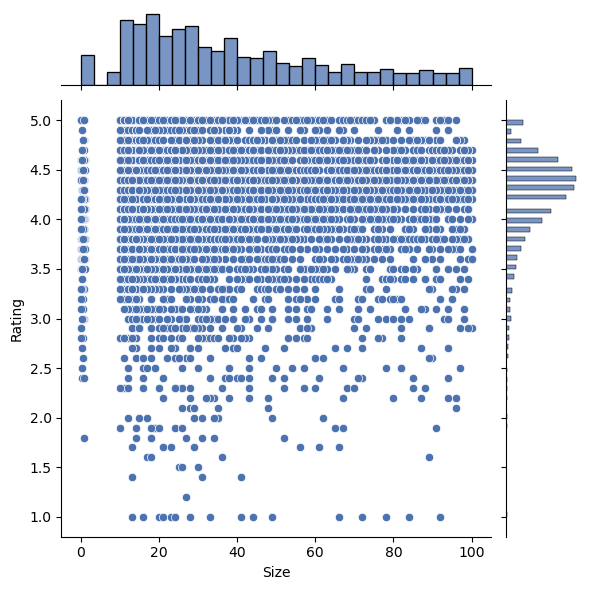

In [35]:
plt.figure(figsize=(6,10))
plt.style.use('default')

sns.jointplot(apps.Size, apps.Rating, kind='scatter', color='b')
plt.rcParams['axes.grid'] = False;

Most top rated apps are optionally sized between <b>~10MB to ~40MB</b> - neither too light nor too heavy

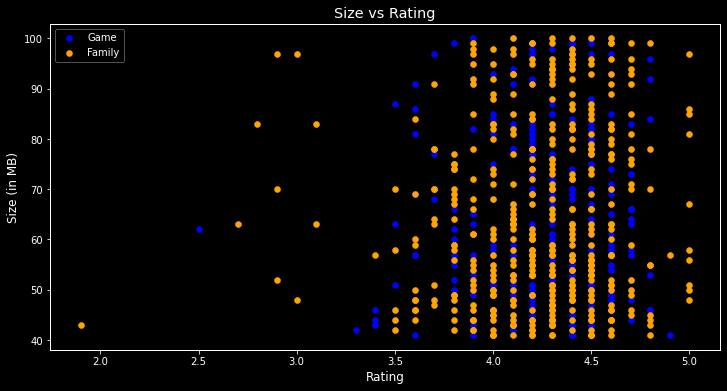

In [136]:
family_game = pd.read_csv('size_rating.csv')

plt.figure(figsize=(12,6))
plt.style.use('dark_background')

plt.scatter(family_game.Game_x, family_game.Game_Family_y, color='b', label='Game')
plt.scatter(family_game.Family_x, family_game.Game_Family_y, color='orange',label='Family')
plt.ylabel('Size (in MB)')
plt.xlabel('Rating', color='white')
plt.title('Size vs Rating')
plt.legend()
plt.grid(None);


Most bulky apps <b>( >40MB)</b> belong to the <b>Game</b> and <b>Family</b> category. Despite this, these bulky apps are fairly highly rated indicating that they are bulky for a purpose.

### Pricing Strategy - Free vs Paid

How does pricing affect Rating

<Figure size 600x400 with 0 Axes>

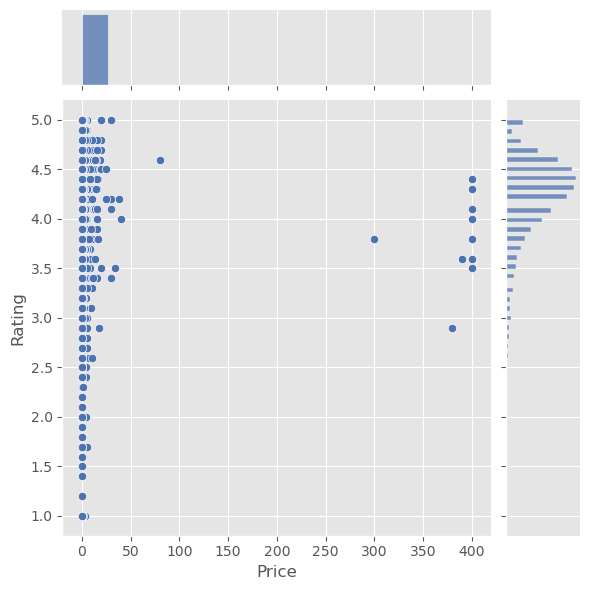

In [37]:
plt.figure(figsize=(6,4))
plt.style.use('ggplot')

sns.jointplot(apps.Price, apps.Rating, color='b');

Most top rated apps are optionally priced between <b>~1\\$ to ~30\\$ </b>. There are only a very few apps price above 20$.

### Current Pricing Trend - How to price your app?

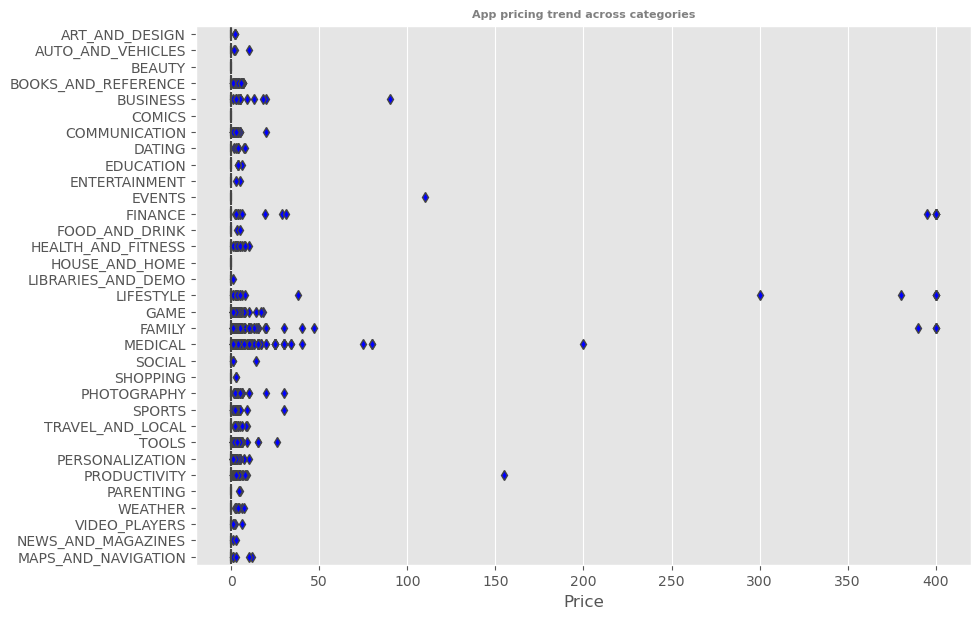

In [121]:
plt.figure(figsize=(10,7))

pricing_category = apps[['Category','Price']]

sns.boxplot(y=pricing_category.Category, x=pricing_category.Price, flierprops={'markerfacecolor':'blue'})
plt.title('App pricing trend across categories', fontdict={'fontsize':8, 'fontweight':'bold'}, color='grey')
plt.ylabel(None);


<b>Shocking...Apps Priced above 250$</b>.  Let's quickly examine what these junk apps are!.


In [116]:
app_pricing = app_names[['Category', 'App', 'Price']]

app_pricing.Price = [x.strip('$') if type(x) == str else x for x in app_pricing.Price]
app_pricing.Price = app_pricing.Price.replace('Everyone', np.nan)
app_pricing.Price = pd.to_numeric(app_pricing.Price, errors='coerce')

most_priced = app_pricing.loc[app_pricing.Price > 250]
most_priced

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


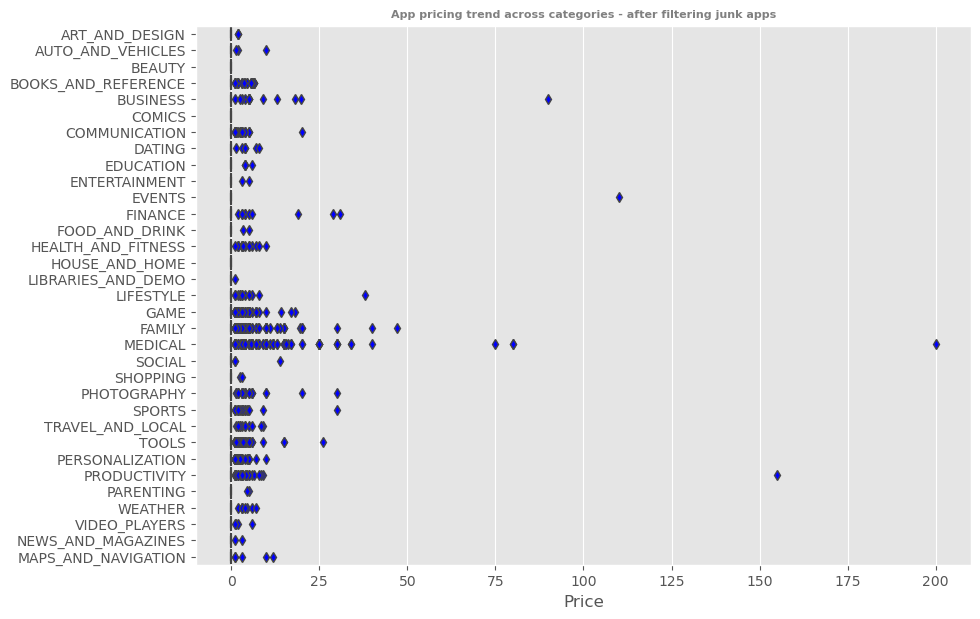

In [122]:
pricing_category2 = apps[['Category','Price']]
pricing_category2 = pricing_category2.loc[pricing_category2.Price < 250]

plt.figure(figsize=(10,7))

sns.boxplot(y=pricing_category2.Category, x=pricing_category2.Price, flierprops={'markerfacecolor':'blue'})
plt.title('App pricing trend across categories - after filtering junk apps', 
          fontdict={'fontsize':8, 'fontweight':'bold'}, color='grey')
plt.ylabel(None);

* Clearly, <b>Medical and Family apps</b> are the most expensive. Some medical apps extend up to 200\$
* All other apps are priced under 50\$.
* Surprisingly, <b> all game apps are priced below 20$ </b>

<br>
<br>



### Are paid apps downloaded as much as free apps?

In [161]:
apps.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [222]:
tinstalls = apps[['Type', 'Installs']]
tinstalls_free = tinstalls.loc[tinstalls.Type == 'Free']
tinstalls_paid = tinstalls.loc[tinstalls.Type == 'Paid']
tinstalls_free

,Type,Installs
0,Free,10000.0
1,Free,500000.0
2,Free,5000000.0
3,Free,50000000.0
4,Free,100000.0
...,...,...
10836,Free,5000.0
10837,Free,100.0
10838,Free,1000.0
10839,Free,1000.0


In [223]:
free = round(np.log10(tinstalls_free.Installs),2)
paid = round(np.log10(tinstalls_paid.Installs),2)
free

0        4.0
1        5.7
2        6.7
3        7.7
4        5.0
        ... 
10836    3.7
10837    2.0
10838    3.0
10839    3.0
10840    7.0
Name: Installs, Length: 10039, dtype: float64

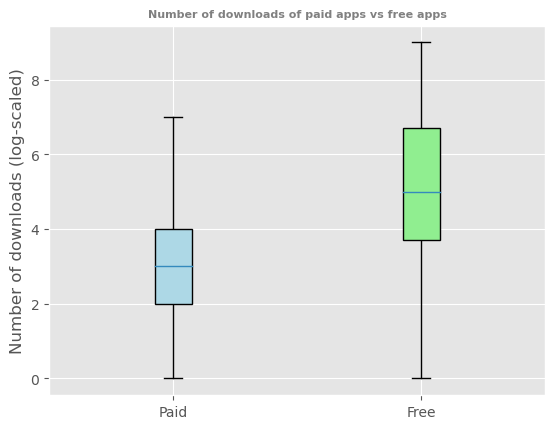

In [229]:
colors = ['lightblue', 'lightgreen']
labels = ['Paid', 'Free']

boxes = plt.boxplot([paid, free], labels= labels, patch_artist = True)

for box in boxes['boxes']:
    for patch, color in zip(boxes['boxes'], colors):
        patch.set_facecolor(color)

plt.ylabel('Number of downloads (log-scaled)')        
plt.title('Number of downloads of paid apps vs free apps', fontdict={'fontsize':8, 'fontweight':'bold'}, color='grey');


<b> Paid apps have relatively lower number of downloads than free apps.</b> However, it is not too bad <br>
<br>
<br>

### Exploring Correlations

<AxesSubplot:>

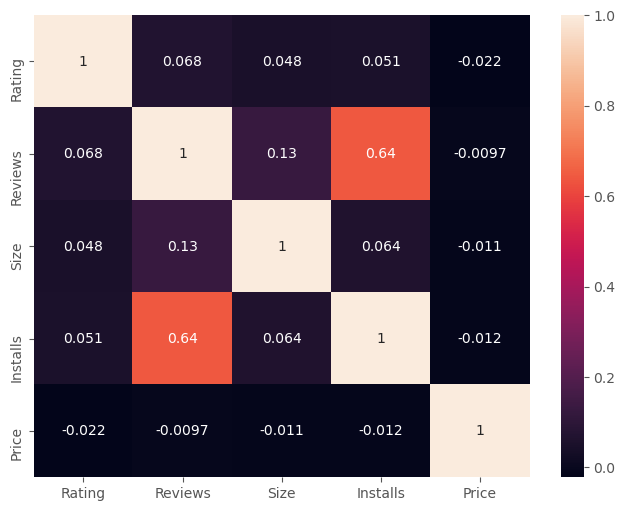

In [242]:
plt.figure(figsize=(8,6))

sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(apps.corr(), annot=True)

In [138]:
installs_reviews = apps[['Installs', 'Reviews']]
installs_reviews.Installs = np.log10(installs_reviews.Installs).dropna(inplace=False)
installs_reviews.Reviews = np.log10(installs_reviews.Reviews).dropna(inplace=False)
installs_reviews

,Installs,Reviews
0,4.00000,2.201397
1,5.69897,2.985426
2,6.69897,4.942058
3,7.69897,5.333737
4,5.00000,2.985426
...,...,...
10836,3.69897,1.579784
10837,2.00000,0.602060
10838,3.00000,0.477121
10839,3.00000,2.056905


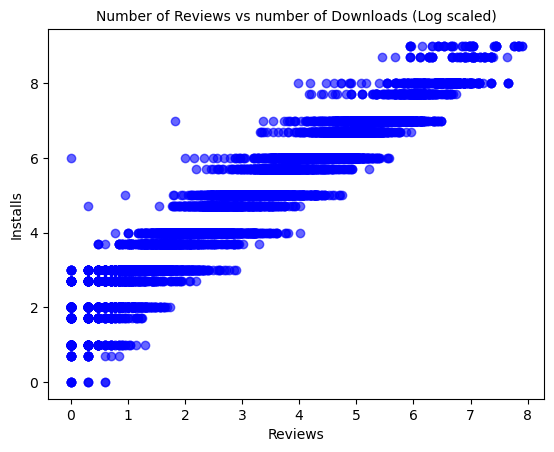

In [151]:
plt.style.use('default')

plt.scatter(installs_reviews.Reviews, installs_reviews.Installs, color='b', alpha=0.6)
plt.ylabel('Installs')
plt.xlabel('Reviews')
plt.title('Number of Reviews vs number of Downloads (Log scaled)', fontdict={'fontsize':10});


<b> A moderate positive correlation of 0.64 exists between number of Reviews and number of Downloads.</b> This means customers tend to download a given app more if it have been reviewed by a large number of people. <br><br> This also means that many active users who download an app usually also leave back a review or feedback. <br><br> So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!<br><br>

### Basic Sentiment Analysis - User reviews

In [14]:
user_reviews.Sentiment = user_reviews['Sentiment'].dropna()
user_sentiment = user_reviews.groupby('Sentiment')['App'].count()
user_sentiment


Sentiment
Negative     8271
Neutral      5163
Positive    23998
Name: App, dtype: int64

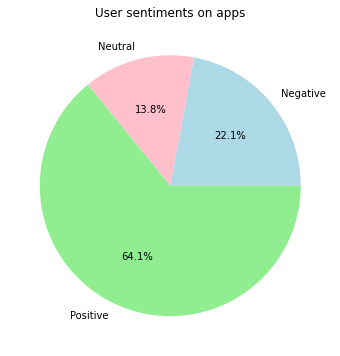

In [17]:
plt.figure(figsize=(6,6))

labels = ['Negative', 'Neutral', 'Positive']
colors = ['lightblue', 'pink', 'lightgreen']

plt.pie(user_sentiment, autopct='%1.1f%%', labels = labels, colors=colors)
plt.title('User sentiments on apps', fontdict={'fontsize':12});

<b> Most apps get a positive sentiment.</b> 

In [40]:
user_reviews['Translated_Review'] = user_reviews['Translated_Review'].astype(str)
Counter(" ".join(user_reviews["Translated_Review"]).split()).most_common(100)

[('I', 33339),
 ('nan', 26868),
 ('game', 6602),
 ('like', 5021),
 ('The', 4721),
 ('get', 4527),
 ('It', 4334),
 ('This', 3941),
 ('good', 3369),
 ('love', 3268),
 ('time', 3246),
 ('would', 2997),
 ("It's", 2680),
 ('app.', 2633),
 ('really', 2612),
 ('even', 2516),
 ('great', 2442),
 ("I'm", 2423),
 ("can't", 2198),
 ('it.', 2182),
 ('much', 1935),
 ('play', 1926),
 ('make', 1925),
 ('want', 1850),
 ('many', 1837),
 ('new', 1772),
 ("I've", 1763),
 ('need', 1704),
 ('way', 1643),
 ('phone', 1638),
 ('Great', 1625),
 ('see', 1598),
 ('every', 1577),
 ('easy', 1555),
 ('still', 1554),
 ('back', 1547),
 ('update', 1535),
 ('work', 1517),
 ('ads', 1507),
 ('Very', 1493),
 ('But', 1461),
 ('using', 1453),
 ('could', 1433),
 ('fix', 1399),
 ('the', 1384),
 ('also', 1367),
 ('go', 1341),
 ('game.', 1330),
 ('give', 1313),
 ('best', 1308),
 ('5', 1293),
 ('better', 1293),
 ('If', 1266),
 ('You', 1253),
 ('used', 1244),
 ('add', 1232),
 ('And', 1218),
 ('know', 1213),
 ('people', 1208),
 ('a

<b> Most frequent Poistive words in Reviews: like, good, love, great, easy</b> <br><br>
<b> Most frequent Negative wors in Reviews: ads, problem, fix</b> <br>

## Conclusion <br><br>
* Average rating of active apps in Google PlayStore is <b>4.19</b><br><br>
* <b> Users prefer to pay for apps that are light-weighted.</b> Thus, a paid app that is bulky might not perform well in the market.<br><br>
* Most of the top rated apps are <b>optimally sized between ~10MB to ~40MB</b> - neither too light nor too heavy.<br><br>
* Most of the top rated apps are <b>optimally priced between ~1\\$ to ~30\\$</b> - neither too cheap nor too expensive.<br><br>
* <b>Medical and Family apps are the most expensive</b> and even extend upto 200\$.<br><br>
* Users tend to download a given app more if it has been reviewed by a large number of people.<br><br>
* <b>Health and Fitness</b> apps receive more than <b>85% positive reviews. Game and Social</b> apps receive mixed feedback - <b>50% positive and 50% negative.</b><br><br>
* <b> Users generally give a positive sentiment to most apps.</b>